# Artificial Neural Networks

## [Perceptron in 11 lines of code](https://iamtrask.github.io/2015/07/12/basic-python-network/)


In [0]:
import numpy as np
# input dataset
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
# output dataset
y = np.array([[0,1,1,0]]).T

np.random.seed(1)
# initialize weights randomly with mean 0 
#sin0 input layer weigths
syn0 = 2*np.random.random((3,4)) - 1
#sin1 output layer weigths
syn1 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    # forward propagation
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    
     # back propagation
     # multiply how much we missed by the 
     # slope of the sigmoid at the values in l1
    l2_delta = (y - l2)*(l2*(1-l2))
    #apply chain rule the input layer
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    
    #update weigths
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
    
    # print mean square error
    error=(y - l2)
    #print(np.square(error).mean())

#operation
for i in range(4):
    l1 = 1/(1+np.exp(-(np.dot(X[i,:],syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    print('desired',y[i],'obtained:',l2)



desired [0] obtained: [0.0026057]
desired [1] obtained: [0.99672212]
desired [1] obtained: [0.99701713]
desired [0] obtained: [0.00386756]


## Clasiffication with sci-kit
[Multilayer perceptor in scikit](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)






In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import train_test_split
# de acuerdo a la version scikit train_test_split puede ser
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

x_train,x_test, y_train, y_test  = train_test_split(X,y, test_size = 0.7, random_state=0 ) # remove random state o change it 
#TODO: normalize the data 
names=['MPL logistic','MPL tanh','MPL relu','MPL relu/SGD']
clfs=[MLPClassifier(activation='logistic',max_iter=1000),
      MLPClassifier(activation='tanh',max_iter=1000),
      MLPClassifier(activation='relu',max_iter=1000),
      MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes =(10,100,80),max_iter=10000)]

for clf,name in zip(clfs,names):
    print(name) 
    scores = cross_val_score(clf, x_train, y_train, cv=5,scoring='f1_weighted',n_jobs=-1)
    print(scores)
    print('mean {a:5.3f} standard desviation {b:5.3f}'.format(a=scores.mean(),b=scores.std()))
    
    
    
#scoring paramters
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
    




MPL logistic
[1.         0.87830688 0.89206349 1.         0.88571429]
mean 0.931 standard desviation 0.056
MPL tanh
[1.         0.87830688 1.         1.         0.88571429]
mean 0.953 standard desviation 0.058
MPL relu
[0.87830688 0.87830688 0.89206349 1.         0.88571429]
mean 0.907 standard desviation 0.047
MPL relu/SGD
[0.87830688 0.87830688 0.89206349 1.         1.        ]
mean 0.930 standard desviation 0.058


## Regressor with Scikit

## Testing Tensorflow 

Installing with anaconda [tensorflow](https://www.tensorflow.org/install/install_linux#InstallingAnaconda)


In [0]:
import tensorflow as tf
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)


TensorFlow 2.0 Hello World


## [LeNet-5  in TensorFlow with NMIST dataset]

Based in [tensorflow sample](https://www.tensorflow.org/tutorials/layers) and [UDACITY](htttp://www.udacity.com) deep learning classes.

A Guide to TF Layers: Building a Convolutional Neural Network

The TensorFlow layers module provides a high-level API that makes it easy to construct a neural network. It provides methods that facilitate the creation of dense (fully connected) layers and convolutional layers, adding activation functions, and applying dropout regularization. In this tutorial, we gonna build a convolutional neural network model to recognize the handwritten digits in the MNIST data set.

handwritten digits 0–9 from the MNIST data set

The MNIST dataset comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28x28-pixel monochrome images.





### Load data

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Train data: X=(60000, 28, 28), y=(60000,)
Test data: X=(10000, 28, 28), y=(10000,)


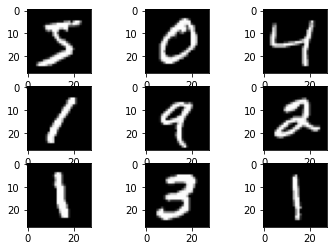

In [0]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train data: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test data: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

### Prepare data


In [0]:
from keras.utils import to_categorical
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train):
	# convert from integers to floats
	train_norm = train.astype('float32')
	# normalize to range 0-1
	norm_image = train_norm / 255.0
	# return normalized images
	return norm_image

	# load dataset
trainX, trainY, testX, testY = load_dataset()


	# prepare pixel data
trainX = prep_pixels(trainX)
testX = prep_pixels(testX)

# Reserve 10,000 samples for validation
x_val = trainX[-10000:]
y_val = trainY[-10000:]
x_train = trainX[:-10000]
y_train = trainY[:-10000]

### Model


Building the CNN MNIST Classifier

Let's build a model to classify the images in the MNIST dataset using the following CNN architecture:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 16 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization (probability that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


![texto alternativo](https://https://miro.medium.com/max/1400/0*H9_eGAtkQXJXtkoK)


In [0]:
# Parameters
learning_rate = 0.00001



# Network Parameters
input_shape=(28, 28, 1)
n_classes = 10  # MNIST total classes (0-9 digits)


In [0]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
  model.add(Conv2D(16, kernel_size=(5, 5), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(units=120, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(units=84, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_classes, activation='softmax'))
	# compile model
  opt = SGD(lr=learning_rate, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model=define_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

### Training variables

In [0]:
epochs = 15  # more epochs better
batch_size =128
# fit model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,validation_data=(x_val, y_val))
print('\nhistory dict:', history.history)




Epoch 1/15
391/391 [==============================] - 1s 4ms/step - loss: 0.4551 - accuracy: 0.8725 - val_loss: 0.4114 - val_accuracy: 0.8871
Epoch 2/15
391/391 [==============================] - 1s 4ms/step - loss: 0.4462 - accuracy: 0.8745 - val_loss: 0.4034 - val_accuracy: 0.8892
Epoch 3/15
391/391 [==============================] - 1s 4ms/step - loss: 0.4380 - accuracy: 0.8762 - val_loss: 0.3956 - val_accuracy: 0.8899
Epoch 4/15
391/391 [==============================] - 1s 4ms/step - loss: 0.4303 - accuracy: 0.8784 - val_loss: 0.3884 - val_accuracy: 0.8914
Epoch 5/15
391/391 [==============================] - 1s 4ms/step - loss: 0.4232 - accuracy: 0.8801 - val_loss: 0.3820 - val_accuracy: 0.8932
Epoch 6/15
391/391 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8821 - val_loss: 0.3755 - val_accuracy: 0.8944
Epoch 7/15
391/391 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8838 - val_loss: 0.3693 - val_accuracy: 0.8963
Epoch 

We use a loss function to determine how far the predicted values deviate from the actual values in the training data

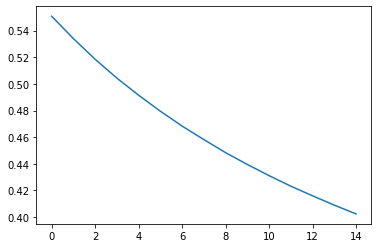

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

### validate the model


In [0]:
model.save('final_model.h5')
results = model.evaluate(testX, testY)

print('test loss, test acc:', results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.9043
test loss, test acc: [0.33666351437568665, 0.9042999744415283]


### Predict a value

[[1.3e-04 2.1e-03 1.4e-02 9.5e-01 3.7e-05 5.5e-03 3.7e-04 3.2e-04 2.5e-02
  3.3e-04]]
predicted value 3
expected value 3


Text(0.5, 1.0, 'image #753 : 3')

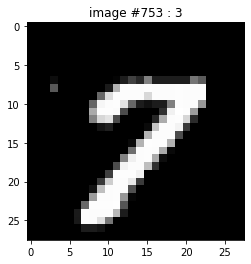

In [0]:
import numpy as np

np.set_printoptions(1)
num=np.random.randint(testX.shape[0])

predictions = model.predict(testX[num].reshape(1,28,28,1))
print(predictions)
print("predicted value",np.argmax(predictions))

# comparing the result
print("expected value",np.argmax(testY[num]))

plt.imshow(trainX[num].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title('image #'+str(num)+" : "+str(np.argmax(testY[num])))

### load the model and predict

In [0]:

from tensorflow.keras.models import load_model

new_model=load_model('final_model.h5')



### Testing

We are going to augment the data translating the image form center,rotating or applying a zoom.

This can be made by hand with [opencv](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)



In [0]:
import numpy as np
import cv2
import random
def play_with_image(img):
            op=['trans -','trans +','rot -','rot +','zoom +']
            rows,cols,c = img.shape
            l=random.randint(0, 4)
            if(l==0): # translate between -5 -1
                x=random.randint(-5, -1)
                y=random.randint(-5, -1)
                M = np.float32([[1,0,x],[0,1,y]])
                new_img = cv2.warpAffine(img,M,(cols,rows))
            elif(l==1): # translate between 1 5
                x=random.randint(1, 5)
                y=random.randint(1, 5)
                M = np.float32([[1,0,x],[0,1,y]])
                new_img = cv2.warpAffine(img,M,(cols,rows))
            elif(l==2): # rotate between -20 -3
                r=random.randint(-20, -3)
                M = cv2.getRotationMatrix2D((cols/2,rows/2),r,1)
                new_img  = cv2.warpAffine(img,M,(cols,rows))
            elif(l==3): # rotate between 3 20
                r=random.randint(3, 20)
                #print(r)
                M = cv2.getRotationMatrix2D((cols/2,rows/2),r,1)
                new_img  = cv2.warpAffine(img,M,(cols,rows))
            elif(l==4): # zoom the image
                x=random.randint(1, 6)*2
                y=random.randint(1, 6)*2
                new_img = cv2.resize(img,(rows+x, cols+y), interpolation = cv2.INTER_CUBIC)
                #new_img = new_img[int(x/2.):-int(x/2.),int(y/2.):-int(y/2.)]
                #new_img.reshape(28,28)
                #print(new_img.shape)
                new_img = new_img[:28,-28:]
            return (new_img,op[l])

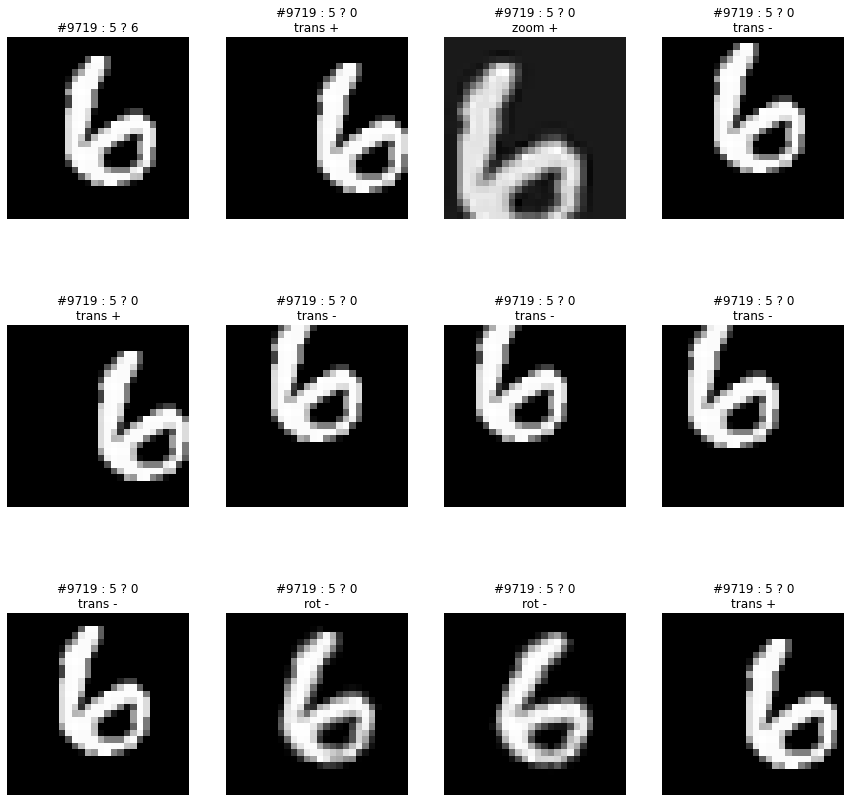

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
f = plt.figure(figsize=(15,15))
wish=np.random.randint(testX.shape[0])


#add noise

stacked_img=trainX[wish].reshape(28,28,1)
#stacked_img = np.stack((trainX[wish].reshape(28,28),)*3,2).reshape((28,28,3))
predictions = new_model.predict(stacked_img.reshape(1,28,28,1))
ax = f.add_subplot(3,4,1)
ax.imshow(stacked_img.reshape(28,28), cmap=plt.get_cmap('gray'))
ax.axis("off")
ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions)))

for i in range(2,13):
  ax = f.add_subplot(3,4,i)
  new_img,op=play_with_image(stacked_img)
  predictions = new_model.predict(testX[wish].reshape(1,28,28,1))
  ax.imshow(new_img.reshape(28,28), cmap=plt.get_cmap('gray'))
  ax.axis("off")
  ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions))+'\n'+op)


Keras has an automatic class to make augmentation
[Preprocessing](https://keras.io/preprocessing/image/)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
data_aug.fit(testX)

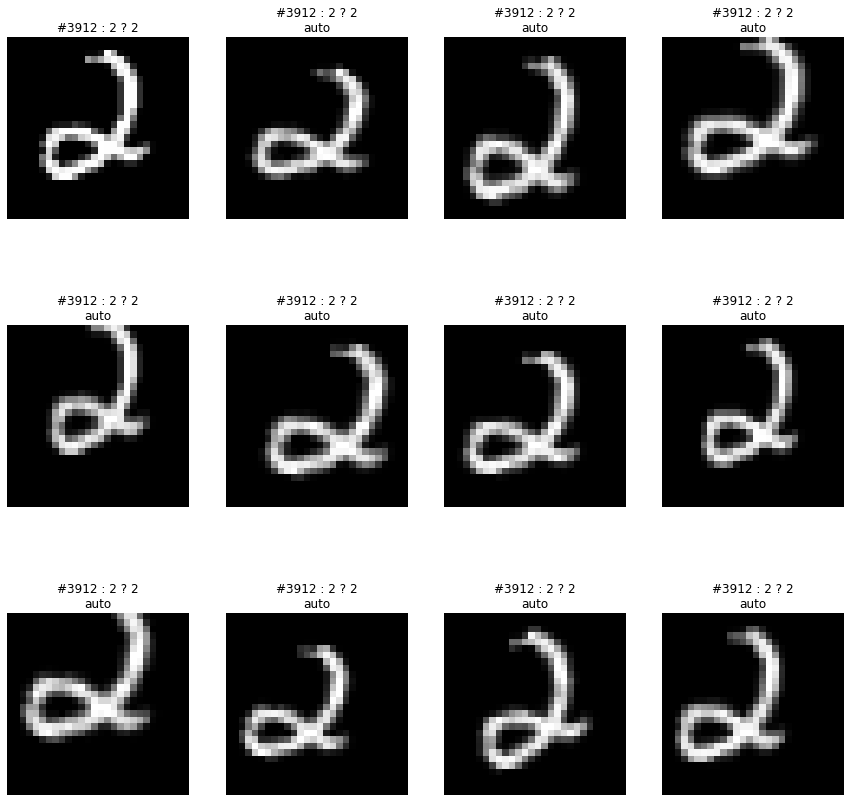

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



f = plt.figure(figsize=(15,15))
wish=np.random.randint(testX.shape[0])



stacked_img=testX[wish].reshape(28,28,1)
#stacked_img = np.stack((trainX[wish].reshape(28,28),)*3,2).reshape((28,28,3))
predictions = new_model.predict(stacked_img.reshape(1,28,28,1))
ax = f.add_subplot(3,4,1)
ax.imshow(stacked_img.reshape(28,28), cmap=plt.get_cmap('gray'))
ax.axis("off")
ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions)))

for i in range(2,13):
  ax = f.add_subplot(3,4,i)
  op="auto"
  new_img=data_aug.random_transform(stacked_img)
  predictions = new_model.predict(testX[wish].reshape(1,28,28,1))
  ax.imshow(new_img.reshape(28,28), cmap=plt.get_cmap('gray'))
  ax.axis("off")
  ax.set_title('#'+str(wish)+" : "+str(np.argmax(testY[wish]))+" ? "+str(np.argmax(predictions))+'\n'+op)
